# LL - Benchmarks

In [165]:
# using Revise
# using BenchmarkTools
# using DataFrames
# using DataFramesMeta
# using Plots
# using Random
# using Unitful
# using Formatting
# using Latexify

In [166]:
# include("../src/SortingAlgo.jl")
# include("../src/MyV.jl")
# include("../src/MyLL.jl")

# using .SortingAlgo
# using .MyV

In [167]:
# just checking that the functions work properly  
k = 3
n = 10
v = createrandomvector(k, n)
l = isllistfromvector(v)

println("before")
println(v)
println(l)
quicksort!(v)
randomized_quicksort!(v)
quicksort!(l)
println("after")
println(v)
println(l)

before
[5, 9, 6]
5 9 6 
after
[5, 6, 9]
5 6 9 


In [168]:
"""
A benchmark function. 
Returns a tuple containg 
- n nbr of elements in list, 
- elapsed time in nanoseconds for the singly linked list,
- elapsed time in nanoseconds for the doubly linked list.

# Arguments
- `n`: Number of elements in list
"""
function qsbench(n)

    v = createrandomvector(n, n)
    l = isllistfromvector(v)

    vector_time = @timed begin
        quicksort!(v)
    end

    rand_time = @timed begin
        randomized_quicksort!(v)
    end

    list_time = @timed begin
        quicksort!(l)
    end

    # return n, k, sll_time, dll_time # ns # when using @elapsed
    return n, vector_time[2], rand_time[2], list_time[2] # when using @timed
    # return n, k, minimum(sll_time).time, minimum(dll_time).time, minimum(sll_time).memory, minimum(dll_time).memory  # when using @timed
end

qsbench

In [169]:
benchresults = Vector(undef, 0)
for n = 10000000:10000000:100000000
    push!(benchresults, qsbench(n))
end

In [170]:
for timedoperation ∈ benchresults
    println(timedoperation)
end

(10000000, 0.779024593, 0.339928846, 1.233160272)
(20000000, 1.546596712, 0.679316794, 2.459809032)
(30000000, 2.470316544, 1.108821352, 3.987428275)
(40000000, 3.367847131, 1.438284617, 5.258963831)
(50000000, 4.450138449, 1.925583776, 6.968345757)
(60000000, 5.309260578, 2.414511232, 8.634057693)
(70000000, 6.403586399, 2.73619473, 10.882302554)
(80000000, 7.823331712, 3.262722091, 12.543023283)
(90000000, 9.592222331, 3.948366187, 14.490856349)
(100000000, 10.180063551, 4.200584101, 16.329829901)



## TODO: Data manipulation
* Ratio,  
  * Growth (within list)
  * Difference between lists
* Plots
  * do this with Plots.jl
* n and k in a more readable way
  * e.g. 10 000 instead of 10000 
* Manipulate time units. 
  * E.g. from ns to ms. Do this with Unitful


In [171]:
# Dataframe
df = DataFrame([[benchresults[k][kk] for k in 1:length(benchresults)] for kk in 1:length(benchresults[1])], [:n, :vector, :rand, :list])
# df = DataFrame([[benchresults[k][kk] for k in 1:length(benchresults)] for kk in 1:length(benchresults[1])], [:n, :k, :SLL, :DLL, :SLL_memory,:DLL_memory])

,n,vector,rand,list
,Int64,Float64,Float64,Float64
1,10000000,0.779025,0.339929,1.23316
2,20000000,1.5466,0.679317,2.45981
3,30000000,2.47032,1.10882,3.98743
4,40000000,3.36785,1.43828,5.25896
5,50000000,4.45014,1.92558,6.96835
6,60000000,5.30926,2.41451,8.63406
7,70000000,6.40359,2.73619,10.8823
8,80000000,7.82333,3.26272,12.543
9,90000000,9.59222,3.94837,14.4909


In [172]:
# Data manipulation functions
f_ratio = (x, y) -> x/y

f_readable_n = x -> format(x, commas=false,autoscale=:finance,precision=0)

# u stands for unit and ns for nanoseconds
f_readable_time = x -> round(x, digits = 2) |> x -> x*u"ns" 

f_readable_ratio = x -> round(x, digits = 1)

#173 (generic function with 1 method)

In [173]:
# Testing that the formatting works properly
t_example = f_readable_time(456.45555)
n_example = f_readable_n(4564655)
r_example = f_readable_ratio(2.4555)
println(t_example)
println(n_example)
println(r_example)

456.46 ns
5m
2.5


In [174]:
# Data Transformations
df_trans = @transform(df, :Ratio = f_ratio.(:vector,:list))
@transform!(df_trans, :Growth_Ratio_vector = f_ratio.(:vector, :vector[1]))
@transform!(df_trans, :Growth_Ratio_rand = f_ratio.(:rand, :rand[1]))
@transform!(df_trans, :Growth_Ratio_list = f_ratio.(:list, :list[1]));

In [ ]:
# Data formatting
df_trans[!,:n] = f_readable_n.(df_trans[:,:n])
df_trans[!,:vector] = f_readable_time.(df_trans[:,:vector])
df_trans[!,:rand] = f_readable_time.(df_trans[:,:rand])
df_trans[!,:list] = f_readable_time.(df_trans[:,:list])

df_trans[!,:Ratio] = f_readable_ratio.(df_trans[:,:Ratio])

df_trans[!,:Growth_Ratio_vector] = f_readable_ratio.(df_trans[:,:Growth_Ratio_vector])
df_trans[!,:Growth_Ratio_rand] = f_readable_ratio.(df_trans[:,:Growth_Ratio_rand])
df_trans[!,:Growth_Ratio_list] = f_readable_ratio.(df_trans[:,:Growth_Ratio_list]);

In [ ]:
# Quick-check
df_trans

,n,vector,rand,list,Ratio,Growth_Ratio_vector,Growth_Ratio_rand
,String,Quantity…,Float64,Quantity…,Quantity…,Float64,Float64
1,10m,0.78 ns,0.339929,1.23 ns,0.63 ns,1.0,1.0
2,20m,1.55 ns,0.679317,2.46 ns,0.63 ns,2.0,2.0
3,30m,2.47 ns,1.10882,3.99 ns,0.62 ns,3.2,3.3
4,40m,3.37 ns,1.43828,5.26 ns,0.64 ns,4.3,4.2
5,50m,4.45 ns,1.92558,6.97 ns,0.64 ns,5.7,5.7
6,60m,5.31 ns,2.41451,8.63 ns,0.61 ns,6.8,7.1
7,70m,6.4 ns,2.73619,10.88 ns,0.59 ns,8.2,8.0
8,80m,7.82 ns,3.26272,12.54 ns,0.62 ns,10.0,9.6
9,90m,9.59 ns,3.94837,14.49 ns,0.66 ns,12.3,11.6


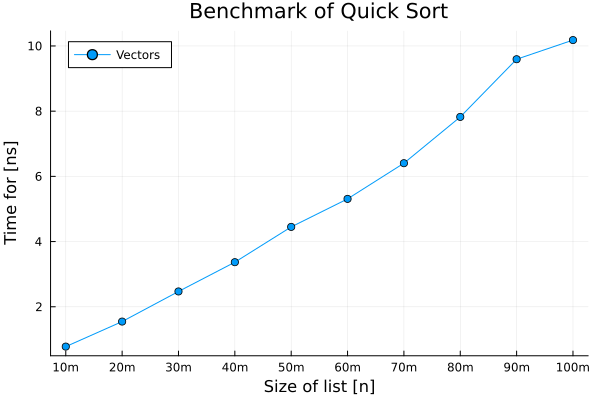

In [177]:
qs_fig1 = plot(df_trans[:,:n], df[:,:vector],
    xlabel = "Size of list [n]",
    ylabel = "Time for [ns]",
    title = "Benchmark of Quick Sort",
    label = "Vectors",
    legend = :topleft,
    shape = :circle)

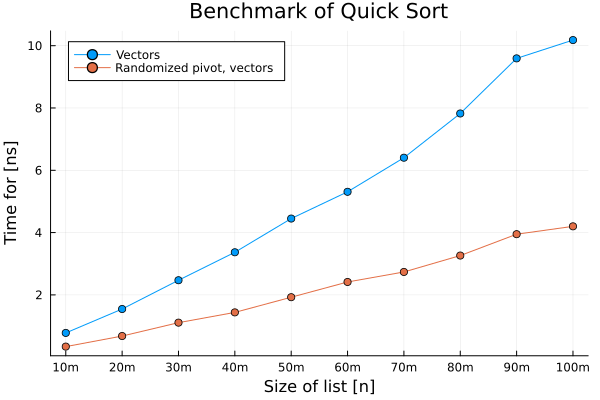

In [178]:

qs_fig1 = plot!(df_trans[:,:n], df[:,:rand],
    label = "Randomized pivot, vectors",
    legend = :topleft,
    shape = :circle)

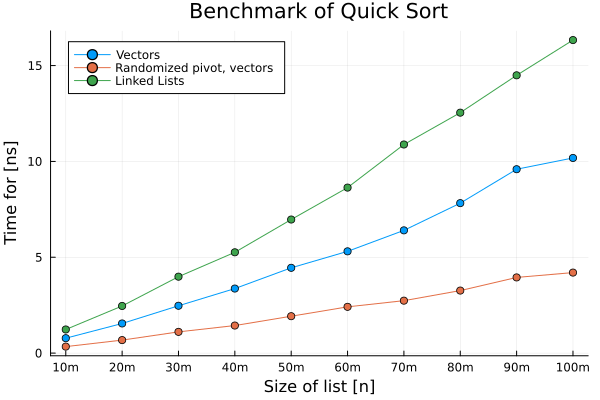

In [179]:

qs_fig1 = plot!(df_trans[:,:n], df[:,:list],
    label = "Linked Lists",
    legend = :topleft,
    shape = :circle)

In [180]:
filepath = pwd()
savefig(qs_fig1,filepath*"/../tex/quick/input/ws_fig1.pdf")

In [181]:
latexify(df_trans, env=:tabular) |> print

\begin{tabular}{ccccccccc}
$n$ & $vector$ & $rand$ & $list$ & $Ratio$ & $Growth_{Ratio\_vector}$ & $Growth_{Ratio\_rand}$ & $Growth_{Ratio\_list}$ & $random$\\
$10 \cdot m$ & $0.78 ns$ & $0.339928846$ & $1.23 ns$ & $0.63 ns$ & $1.0$ & $1.0$ & $1.0$ & $0.34 ns$\\
$20 \cdot m$ & $1.55 ns$ & $0.679316794$ & $2.46 ns$ & $0.63 ns$ & $2.0$ & $2.0$ & $2.0$ & $0.68 ns$\\
$30 \cdot m$ & $2.47 ns$ & $1.108821352$ & $3.99 ns$ & $0.62 ns$ & $3.2$ & $3.3$ & $3.2$ & $1.11 ns$\\
$40 \cdot m$ & $3.37 ns$ & $1.438284617$ & $5.26 ns$ & $0.64 ns$ & $4.3$ & $4.2$ & $4.3$ & $1.44 ns$\\
$50 \cdot m$ & $4.45 ns$ & $1.925583776$ & $6.97 ns$ & $0.64 ns$ & $5.7$ & $5.7$ & $5.7$ & $1.93 ns$\\
$60 \cdot m$ & $5.31 ns$ & $2.414511232$ & $8.63 ns$ & $0.61 ns$ & $6.8$ & $7.1$ & $7.0$ & $2.41 ns$\\
$70 \cdot m$ & $6.4 ns$ & $2.73619473$ & $10.88 ns$ & $0.59 ns$ & $8.2$ & $8.0$ & $8.8$ & $2.74 ns$\\
$80 \cdot m$ & $7.82 ns$ & $3.262722091$ & $12.54 ns$ & $0.62 ns$ & $10.0$ & $9.6$ & $10.2$ & $3.26 ns$\\
$90 \cdot m$ &

In [182]:
pwd()

"/home/vincent/Development/julia/dev/DSandALGO/notebooks"

In [183]:
savefig(qs_fig1,filepath*"/output/ws_fig1.pdf")
